In [1]:
import glob
import random

from ultralytics import YOLO

import numpy as np
import cv2

from keyrover import *
from keyrover.vision import crop_rect

In [2]:
model = YOLO("models/yolo/train4/weights/best.pt")

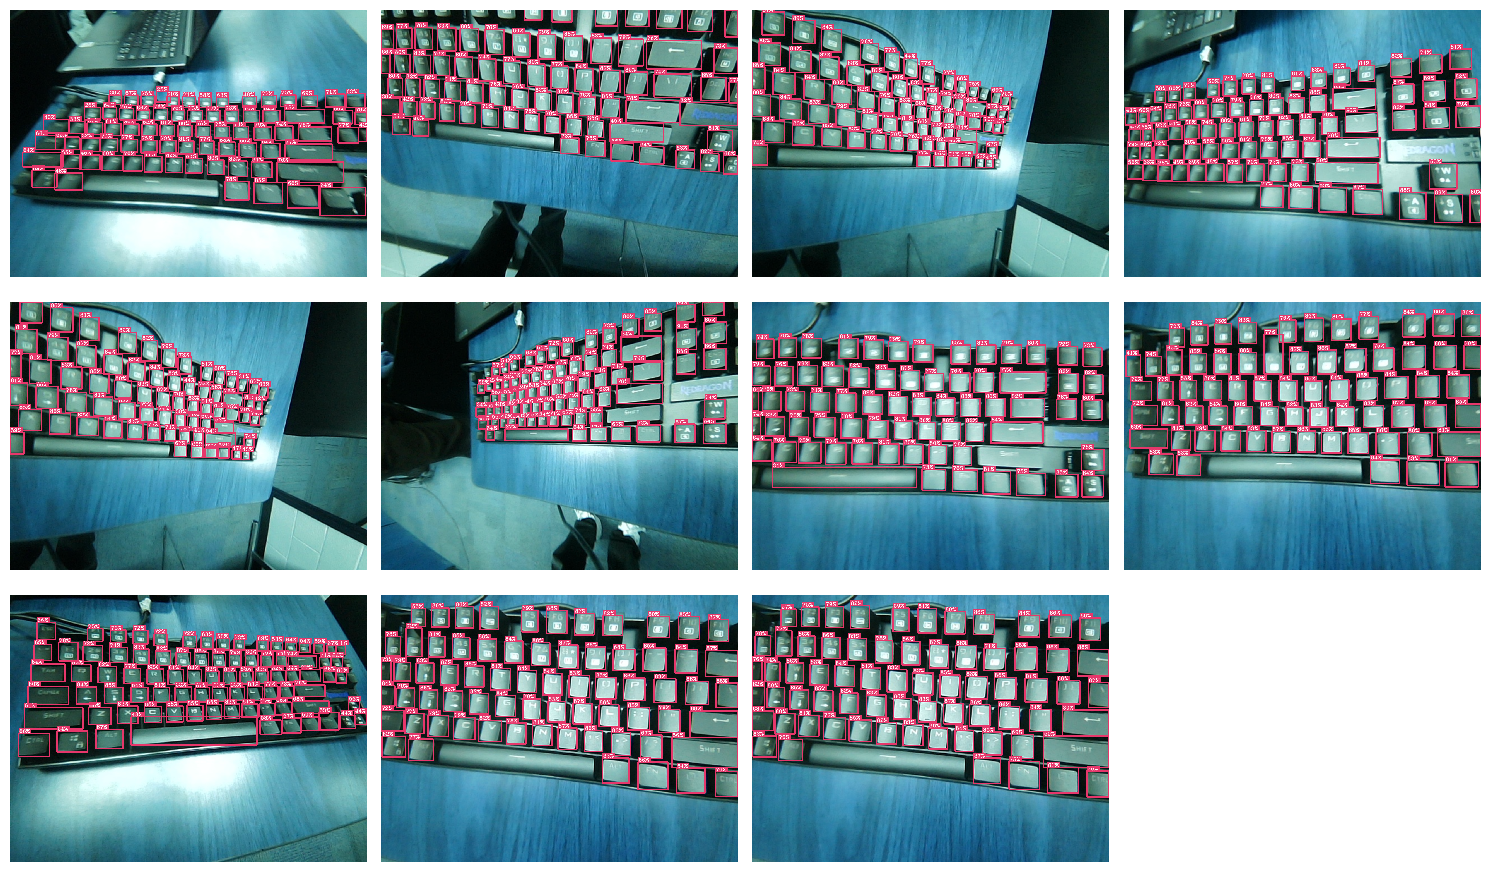

In [3]:
preds = model.predict([p for p in glob.glob(f"{TEST_DATASET}/*")], iou=0.25, verbose=False)
imgs = [plot_results(pred, plot=False, scale=2) for pred in preds]
show_images(imgs, figsize=(15, 9))

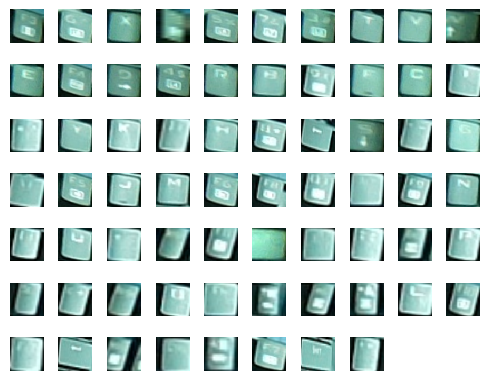

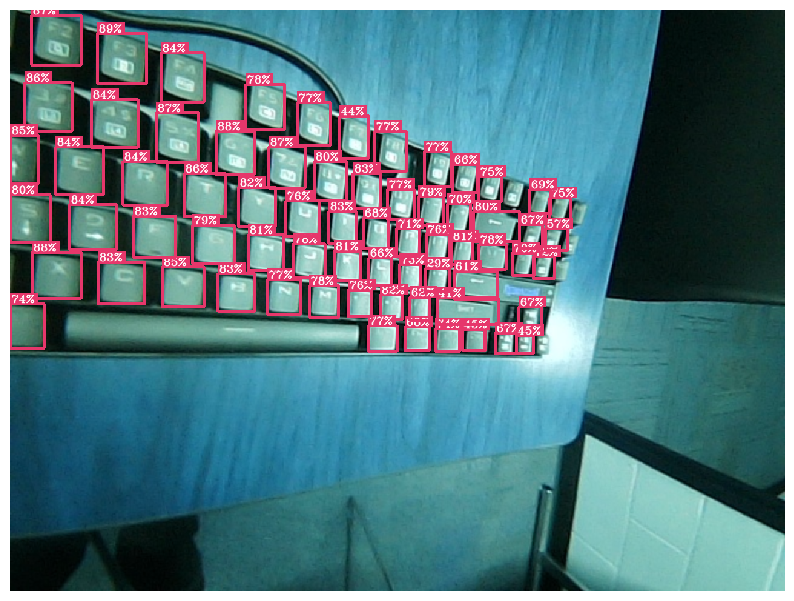

In [7]:
keys = []

pred = random.choice(preds)
img = pred.orig_img

for box in pred.boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    rect = np.array([(x1, y1), (x2, y1), (x2, y2), (x1, y2)], dtype="int")
    
    crop = crop_rect(img, rect)
    crop = cv2.resize(crop, (64, 64))
    crop = np.rot90(crop, k=-1)
    keys.append(crop)

show_images(keys, figsize=(5, 4))
plot_results(pred, scale=2)
